In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Loading the dataset

In [24]:
columns_name=['user_id','item_id','rating','timestamp']
df=pd.read_csv("u.data",sep="\t",names=columns_name)        #u.data is a tsv file (tab separated values)

In [25]:
df.head()             #person with a particular "user_id" gave a movie with a particular "item_id" some rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [26]:
df.shape

(100000, 4)

In [27]:
df['user_id'].nunique()         #extracting the number of users

943

In [28]:
df['item_id'].nunique()        #finding the total number of unique movies

1682

### Loading another dataset to find out which item_id corresponds to which movie

In [33]:
movies=pd.read_csv("u.item",sep="\|",header= None)  

In [35]:
movies.shape         #There are 24 columns bit we just need to extract two columns from this dataset to get the movie names corresponding to each item_id

(1682, 24)

In [36]:
movies=movies[[0,1]]

In [38]:
movies.columns=['item_id','title']

In [39]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Merging both the data frames 

In [40]:
df=pd.merge(df,movies,on="item_id")

In [42]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# Exploratory Data Analysis

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

##### Finding average rating of each movie

In [53]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)                             

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

#### Movies with a rating of exactly 5 or 1 are likely to have been reviewed by only 1 or 2 people because when more number of people rate a movie, the average cannot be a perfect 5 or 1. Any movie which has been rated by only a few number of people cannot be recommended to a user

##### Checking the number of people who have rated a particular movie

In [58]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [69]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])

In [70]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [71]:
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])

In [72]:
ratings

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [75]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


##### plotting a histogram of the number of ratings column to check the distribution

<function matplotlib.pyplot.show(*args, **kw)>

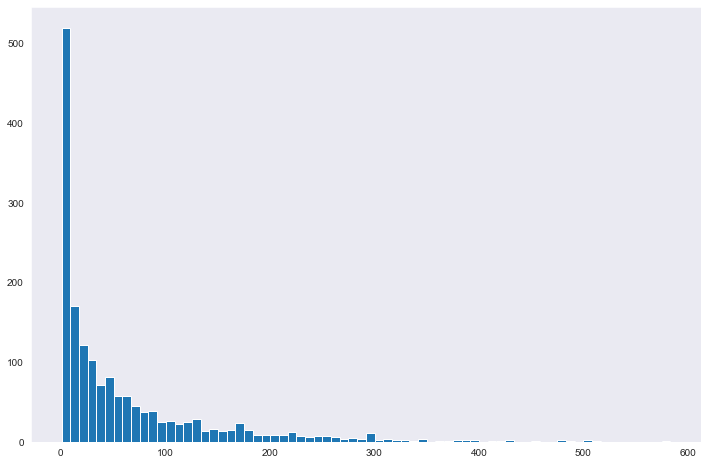

In [79]:
plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70)
plt.show

##### along x-axis we have the number of times movies have been rated. Along y-axis we have how many movies have been rated those number of times. For example, the number of movies that have been rated by 0-10 people are more than 500

<function matplotlib.pyplot.show(*args, **kw)>

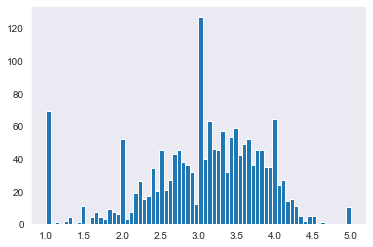

In [80]:
plt.hist(ratings['rating'],bins=70)
plt.show

##### Along x-axis, we have the average ratings and along y-axis, we have the number of movies. This is kind of a normal distribution

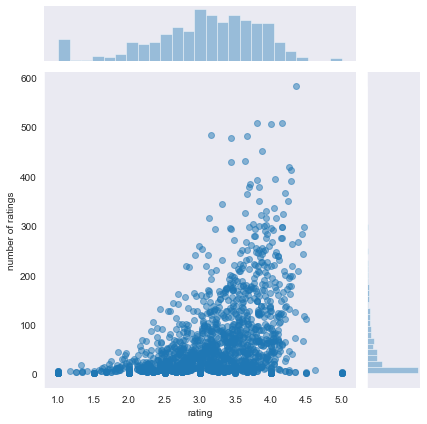

In [81]:
sns.jointplot(x='rating',y='number of ratings',data=ratings,alpha=0.5)

##### The above plot shows that as the rating increases, the number of ratings of that movie also increases. In addition to it, the figure clearly depicts movies which have been rated by very few people by isolated dots (ends of the x axis)

## Creating recommendation system

In [82]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [83]:
moviematrix=df.pivot_table(index="user_id",columns="title",values='rating')

In [84]:
moviematrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### This matrix shows which user has given what rating to which movie. There are a lot of NaN values because all the users have not watched all the movies

In [85]:
ratings.sort_values('number of ratings',ascending=False)

,rating,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [90]:
starwars_user_ratings=moviematrix['Star Wars (1977)']
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [95]:
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings)    #finding correlation of starwars movie withh all other movies

In [94]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

##### There are NaN values corresponding to the movies which have not been rated along with star wars or vice versa since correlation does not exist

In [96]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['correlation'])

In [97]:
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [98]:
corr_starwars.dropna(inplace=True)

In [99]:
corr_starwars

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


##### If a person likes starwars movie, he/she can be recommended the movie with the highest correlation

In [102]:
corr_starwars.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


##### If 6 people have rated  the movie Hollow reed as 5 and the same people out of 583 people have rated star wars as 5, they have a correlation of 1. But this data is not meaningful as very less number of people have rated Hollow Reed. To overcome this, we will put a threshhold at 100 people so thatonly the movies that have been watched by more than 100 people are recommended

##### A movie will be corelated with itself 100%. But the same movie cannot be recommended to a user because he/she will not watch it again.

In [104]:
corr_starwars=corr_starwars.join(ratings['number of ratings'])

In [105]:
corr_starwars.head()

,correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [107]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('correlation',ascending=False)

,correlation,number of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


# Prediction Function

In [112]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['number of ratings'])
    predictions=corr_movie[corr_movie['number of ratings']>100].sort_values('correlation',ascending=False)
    return predictions

In [ ]:
predictions=predict_movies(input())
predictions.head()